In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd
import csv
import time
import progressbar

In [2]:

with open('./clock_times/cplusplus_clock_times.csv', 'r') as f:
    reader = csv.reader(f)
    cplusplus_times = list(reader)[0]
    
with open('./clock_times/python_clock_times.csv', 'r') as f:
    reader = csv.reader(f)
    python_times = list(reader)[0]
    
with open('./clock_times/matlab_times.csv', 'r') as f:
    reader = csv.reader(f)
    matlab_times = list(reader)


In [3]:
new_list = [0]*(len(python_times)-1)
for i in range(len(python_times)-1):
    new_list[i] = float(python_times[i])

python_times = new_list

new_list = [0]*(len(cplusplus_times)-1)
for i in range(len(cplusplus_times)-1):
    new_list[i] = float(cplusplus_times[i])

cplusplus_times = new_list

new_list = [0]*(len(matlab_times)-1)
for i in range(len(matlab_times)-1):
    new_list[i] = float(matlab_times[i][0])

matlab_times = new_list

In [4]:
numpy_times =[]
for i in progressbar.progressbar(range(0,1000)):
    random_array = np.matrix(np.random.randint(0,100,size=(i,i+1)))
    start = time.time()
    x = np.linalg.solve(random_array[:,:-1],random_array[:,-1])
    stop= time.time()
    numpy_times.append(stop-start)
    


100% (1000 of 1000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


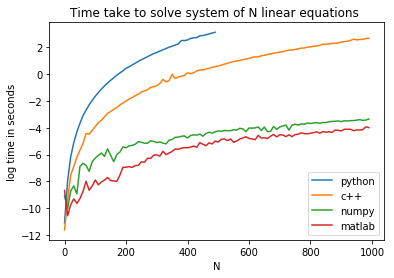

In [5]:
xlabels = np.array(list(range(0,1000)))

plt.plot(xlabels[0:500:10],np.log(python_times[0:500:10]), label ='python')
plt.plot(xlabels[0:1000:10],np.log(cplusplus_times[0:1000:10]), label='c++')
plt.plot(xlabels[0:1000:10],np.log(numpy_times[0:1000:10]),label='numpy')
plt.plot(xlabels[0:1000:10],np.log(matlab_times[0:1000:10]), label='matlab')

plt.xlabel("N")
plt.ylabel("log time in seconds")
plt.title("Time take to solve system of N linear equations ")

plt.legend()
plt.savefig("./times_comparison.pdf")
